# Traffic Signs Dataset (Argentina)
In this notebook, I'm going to be organizing my traffic signs dataset, creating pickle files, etc.

In [7]:
import os
import cv2
import json
import glob
import pickle
import random
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)

In [8]:
# Dataset path
dataset_train = '/home/arian/Documents/proyecto-integrador/data/dataset-v4/'

# Pickle folder 
data_folder = './data/20-classes/'
train_pickle_file = 'train.p' 
valid_pickle_file = 'valid.p'

# Classes file
classes_file = 'classes.json'

# Image size
IMG_SIZE = 64

In [9]:
# Load classes
with open(os.path.join(data_folder, classes_file), mode='r') as json_file:
    classes = json.load(json_file)

In [10]:
classes

{'0': {'color': [139, 42, 175], 'name': 'cruce'},
 '1': {'color': [83, 251, 138], 'name': 'empalme-izq'},
 '10': {'color': [77, 81, 157], 'name': 'control-policial'},
 '11': {'color': [233, 29, 82], 'name': 'max-20'},
 '12': {'color': [217, 172, 114], 'name': 'max-30'},
 '13': {'color': [14, 246, 77], 'name': 'max-40'},
 '14': {'color': [207, 255, 67], 'name': 'max-50'},
 '15': {'color': [222, 180, 32], 'name': 'max-60'},
 '16': {'color': [194, 180, 89], 'name': 'max-80'},
 '17': {'color': [47, 197, 77], 'name': 'max-100'},
 '18': {'color': [22, 156, 96], 'name': 'max-120'},
 '19': {'color': [56, 152, 174], 'name': 'max-130'},
 '2': {'color': [242, 237, 170], 'name': 'empalme-der'},
 '3': {'color': [84, 176, 143], 'name': 'contramano'},
 '4': {'color': [55, 173, 39], 'name': 'curva-izq'},
 '5': {'color': [190, 195, 140], 'name': 'curva-der'},
 '6': {'color': [22, 36, 88], 'name': 'escuela'},
 '7': {'color': [11, 100, 102], 'name': 'lomada'},
 '8': {'color': [152, 112, 207], 'name': 'no

In [11]:
from ipy_table import *

# Auxiliary ists
temp = []
classes_list = []

# Convert the dictionary to a list
for key, value in sorted(classes.items()):
    temp = [key,value['name']]
    classes_list.append(temp)

# Create table with make_table
make_table(classes_list)

# Apply some styles to the table after it is created
set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')

# Render the table
render()

0,cruce
1,empalme-izq
10,control-policial
11,max-20
12,max-30
13,max-40
14,max-50
15,max-60
16,max-80
17,max-100
18,max-120


In [12]:
VALID_PERCENTAGE = 0.70

classes_folder = glob.glob(os.path.join(dataset_train, '*'))

train_data = {'features': [], 'labels': []}
valid_data = {'features': [], 'labels': []}

for class_folder in tqdm_notebook(classes_folder):
    file_filter = '*.jpg'
    file_list = glob.glob(os.path.join(class_folder, file_filter))
    
    class_id = int(os.path.basename(class_folder).split('-')[0])
    
    image_count = len(file_list)
    valid_limit = int(VALID_PERCENTAGE*image_count)
    
    # Add to train_data
    for image_path in file_list[:valid_limit]:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img[...,::-1]
        
        train_data['features'].append(img)
        train_data['labels'].append(class_id)
        
    # Add to valid_data
    for image_path in file_list[valid_limit:]:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img[...,::-1]
        
        valid_data['features'].append(img)
        valid_data['labels'].append(class_id)

In [13]:
# Transform list into numpy arrays
train_data['features'] = np.array(train_data['features'])
train_data['labels'] = np.array(train_data['labels'])

valid_data['features'] = np.array(valid_data['features'])
valid_data['labels'] = np.array(valid_data['labels'])

In [14]:
# Print shapes
print(train_data['features'].shape)
print(train_data['labels'].shape)

print(valid_data['features'].shape)
print(valid_data['labels'].shape)

(29676, 64, 64, 3)
(29676,)
(12732, 64, 64, 3)
(12732,)


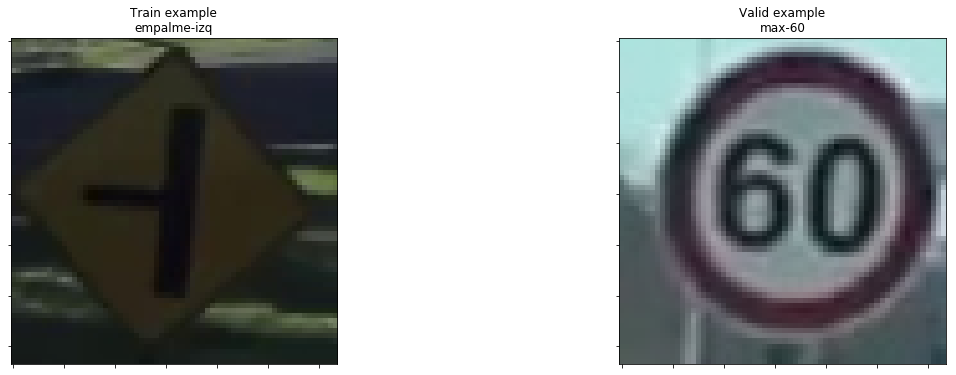

In [18]:
# Verify data
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

index = random.randrange(0, len(train_data['features']))
ax1.imshow(train_data['features'][index])
ax1.set_title('Train example\n' + classes[str(train_data['labels'][index])]['name'])
ax1.set_yticklabels([])
ax1.set_xticklabels([])

index = random.randrange(0, len(valid_data['features']))
ax2.imshow(valid_data['features'][index])
ax2.set_title('Valid example\n' + classes[str(valid_data['labels'][index])]['name'])
ax2.set_yticklabels([])
ax2.set_xticklabels([])

plt.show()

In [19]:
# Save dictionaries to pickle files
pickle_file_path = os.path.join(data_folder, train_pickle_file)
pickle_file = open(pickle_file_path, 'wb')
pickle.dump(train_data, pickle_file)

pickle_file_path = os.path.join(data_folder, valid_pickle_file)
pickle_file = open(pickle_file_path, 'wb')
pickle.dump(valid_data, pickle_file)